<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Normalization_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

In [3]:
import numpy as np
from numpy.linalg import pinv
import pandas as pd
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [28]:
x = np.array(df["X2 house age"])
y = np.array(df["Y house price of unit area"])

# در این قسمت داده ها به مقادیر درست خود نرمال شده اند

In [ ]:
for i in df.columns:
  for j in range(len(df[f"{i}"])):
    df[f"{i}"][j] = (df[f"{i}"][j] - np.mean(df[f"{i}"])) / np.std(df[f"{i}"])

In [27]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1,-0.824722,1.255628,-0.792495,2,1.125430,0.448762,-0.005901
1,-1,0.046851,0.163514,-0.616364,1,0.058895,0.050244,0.314300
2,-1,0.072776,-0.375881,-0.413027,0,0.080592,0.070931,0.687366
3,-1,0.087491,-0.371941,-0.411668,0,0.094318,0.086466,1.227569
4,-1,0.097174,-1.090936,-0.546031,0,0.103109,0.099545,0.395645
...,...,...,...,...,...,...,...,...
409,8,9.043814,6.052182,20.213528,0,8.199249,9.002735,2.612779
410,10,10.121788,2.227533,4.224107,6,8.919745,10.064495,9.313592
411,11,11.704329,8.923320,19.076746,5,9.829934,11.602767,8.431937
412,14,14.350132,3.831338,14.616048,3,11.032686,14.141985,12.074960


In [53]:
tta0, tta1 = np.random.rand(), np.random.rand()


In [80]:
B0, B1 = tta0, tta1

In [74]:
t1 = int(dt.datetime.now().strftime("%s"))

lr =  1e-7
Error_list = []

for itr in tqdm(range(50)):
  error_cost = 0
  cost_B0    = 0
  cost_B1    = 0

  for i in range(len(x)):
    y_pred = B0 + (B1 * x[i])

    error_cost += (y[i] - y_pred) ** 2
    #print(error_cost)
    for j in range(len(x)):
      diff_B0 = -2 * (y[j] - (B0 + B1 * x[j]))
      diff_B1 = (-2 * x[j]) * (y[j] - (B0 + B1 * x[j]))

      cost_B0 += diff_B0
      cost_B1 += diff_B1
    
    B0 -= lr * cost_B0
    B1 -= lr * cost_B1
  Error_list.append(error_cost)
t2 = int(dt.datetime.now().strftime("%s"))

T1 = t2 - t1

100%|██████████| 50/50 [00:16<00:00,  3.03it/s]


In [75]:
B0

0.6392204282586353

In [76]:
B1

0.4888223420162307

Text(0.5, 1.0, 'Normalized data for predicting price of a house as a function of house age')

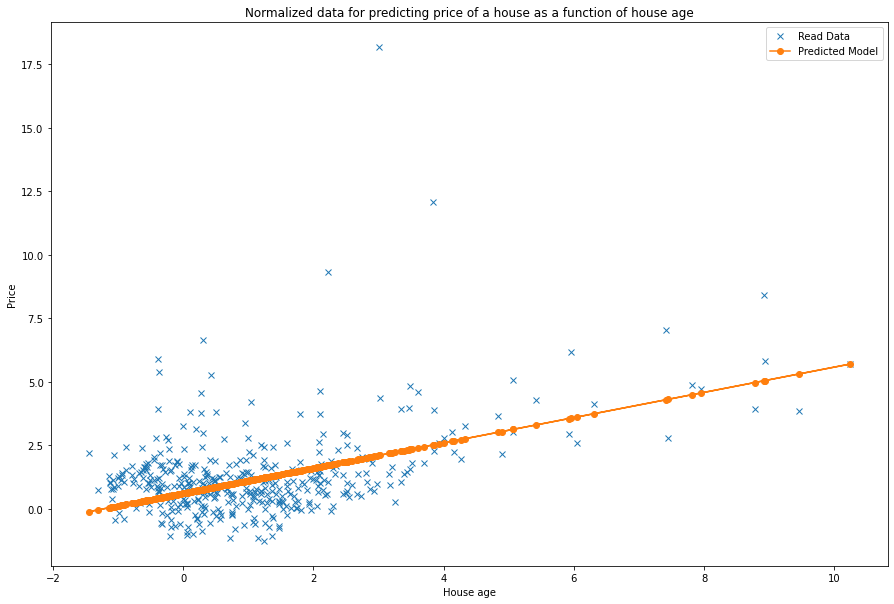

In [71]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, 'x', label = "Read Data")
plt.plot(x, B0 + B1 * x, '-o', label = "Predicted Model")
plt.legend()
plt.xlabel("House age")
plt.ylabel("Price")
plt.title("Normalized data for predicting price of a house as a function of house age")

In [40]:
new_df = df.drop(index = 270)

In [41]:
x1 = np.array(new_df["X2 house age"])
y1 = np.array(new_df["Y house price of unit area"])

In [81]:
t1 = int(dt.datetime.now().strftime("%s"))

lr =  1e-7
Error_list = []

for itr in tqdm(range(50)):
  error_cost = 0
  cost_B0    = 0
  cost_B1    = 0

  for i in range(len(x1)):
    y_pred = B0 + (B1 * x1[i])

    error_cost += (y1[i] - y_pred) ** 2
    #print(error_cost)
    for j in range(len(x1)):
      diff_B0 = -2 * (y1[j] - (B0 + B1 * x1[j]))
      diff_B1 = (-2 * x1[j]) * (y1[j] - (B0 + B1 * x1[j]))

      cost_B0 += diff_B0
      cost_B1 += diff_B1
    
    B0 -= lr * cost_B0
    B1 -= lr * cost_B1
  Error_list.append(error_cost)
t2 = int(dt.datetime.now().strftime("%s"))

T1 = t2 - t1

100%|██████████| 50/50 [00:18<00:00,  2.73it/s]


In [82]:
B0

0.5900350621439835

In [83]:
B1

0.5019182784614155

# خطوط بدست آمده با احتساب داده پرت و بدون احتساب آن
# که شاهد خطای بسیار کمی در محاسبه میباشیم


Text(0.5, 1.0, 'Normalized data for predicting price of a house as a function of house age')

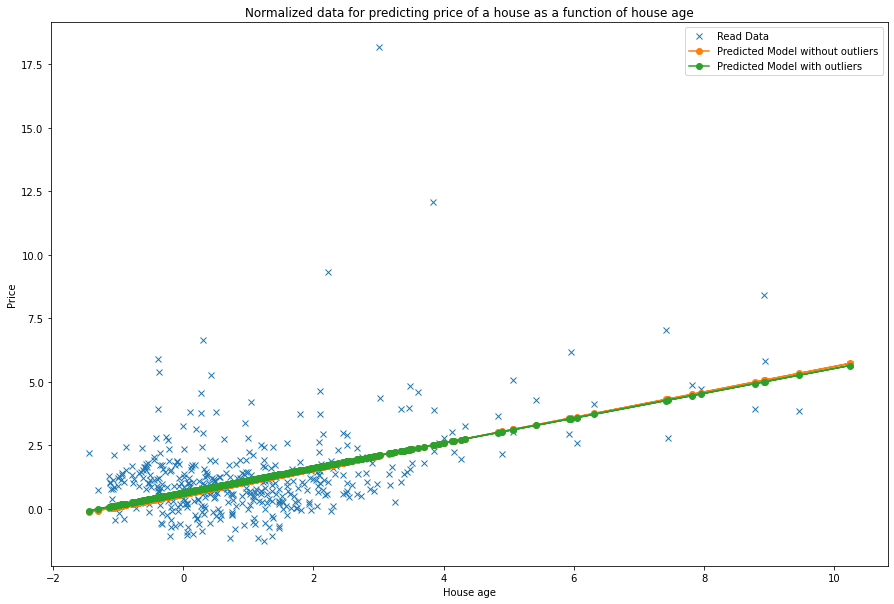

In [85]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, 'x', label = "Read Data")
plt.plot(x, 0.5900 + 0.5019 * x, '-o', label = "Predicted Model without outliers")
plt.plot(x, 0.6392 + 0.4888 * x, '-o', label = "Predicted Model with outliers")
plt.legend()
plt.xlabel("House age")
plt.ylabel("Price")
plt.title("Normalized data for predicting price of a house as a function of house age")